In [32]:
#import all the required packages/libraries
import pandas as pd
import json
from tqdm import tqdm
import pickle
import tensorflow as tf
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [33]:
#url to train_data
url_train = "https://storage.googleapis.com/indianlegalbert/OPEN_SOURCED_FILES/Rhetorical_Role_Benchmark/Data/train.json"

In [34]:
#url to dev data
url_test = "https://storage.googleapis.com/indianlegalbert/OPEN_SOURCED_FILES/Rhetorical_Role_Benchmark/Data/dev.json"

In [35]:
path = "/content/drive/MyDrive/NLP_Project/"

train_path = path + "train.txt"
test_path = path + "test.txt"

In [36]:
#Flatten the annotations column for train data
with open(train_path) as data_file:    
    data_train = json.load(data_file)  

df_train = pd.json_normalize(data_train, record_path=[["annotations"]])
print (df_train.head())

                                              result
0  [{'id': 'd7a902fe9c23417499a7ef782f9fbdeb', 't...
1  [{'id': 'ac4523a0252e4007986cefbd6d5f571a', 'v...
2  [{'id': '43499bd62ea94624b2f38f4cbc677913', 'v...
3  [{'id': 'ec5e65782b1949e4a5445a2115ab5382', 'v...
4  [{'id': '7323f9247fbc4618bf006ef103d7cb3a', 't...


In [37]:
df_train.shape

(247, 1)

In [38]:
#Flatten the annotations column for test data
with open(test_path) as data_file:    
    data_test = json.load(data_file)  

df_test = pd.json_normalize(data_test, record_path=[["annotations"]])
print (df_test.head())

                                              result  id was_cancelled  \
0  [{'id': 'd4814190a8ab41e98029ce8aded54acc', 'v... NaN           NaN   
1  [{'id': '83388fa34e6e4a94944f7ac13e390d81', 'v... NaN           NaN   
2  [{'id': '1960b8864c254a69935c6d0441df2162', 'v... NaN           NaN   
3  [{'id': '4d3fffe7e57c4ae0b422414824ed74f8', 'v... NaN           NaN   
4  [{'id': 'f260a00545a54a938d63d3f994757db4', 'v... NaN           NaN   

  ground_truth created_at updated_at  lead_time  result_count  task  \
0          NaN        NaN        NaN        NaN           NaN   NaN   
1          NaN        NaN        NaN        NaN           NaN   NaN   
2          NaN        NaN        NaN        NaN           NaN   NaN   
3          NaN        NaN        NaN        NaN           NaN   NaN   
4          NaN        NaN        NaN        NaN           NaN   NaN   

   completed_by.id  ... prediction.task prediction.score prediction.result  \
0              NaN  ...             NaN           

In [39]:
x_train = pd.DataFrame(columns = ["text", "output"])
x_test = pd.DataFrame(columns = ["text", "output"])

In [40]:
p = 0
for i in tqdm(range(len(data_train))):
  for j in range(len(data_train[i]["annotations"])):
    for k in range(len(data_train[i]["annotations"][j]["result"])):
      text = data_train[i]["annotations"][j]["result"][k]["value"]["text"]
      output = data_train[i]["annotations"][j]["result"][k]["value"]["labels"][0]
      x_train.loc[p] = [text, output]
      p+=1

# Saving the objects:
with open(path + 'train_data.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(x_train, f)

# Getting back the objects:
with open(path + 'train_data.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    x_train = pickle.load(f)


100%|██████████| 247/247 [01:17<00:00,  3.18it/s]


In [41]:
p = 0
for i in tqdm(range(len(data_test))):
  for j in range(len(data_test[i]["annotations"])):
    for k in range(len(data_test[i]["annotations"][j]["result"])):
      text = data_test[i]["annotations"][j]["result"][k]["value"]["text"]
      output = data_test[i]["annotations"][j]["result"][k]["value"]["labels"][0]
      x_test.loc[p] = [text, output]
      p+=1

# Saving the objects:
with open(path + 'train_data.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(x_test, f)

# Getting back the objects:
with open(path + 'train_data.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    x_test = pickle.load(f)

100%|██████████| 30/30 [00:05<00:00,  5.08it/s]


In [42]:
x_train.head()

,text,output
0,"IN THE HIGH COURT OF KARNATAKA,\n ...",PREAMBLE
1,\n\n BEFORE\n\nTHE HON'BLE MR.JUSTICE ANA...,PREAMBLE
2,This Criminal Appeal is filed under Section 37...,PREAMBLE
3,\n\n This appeal coming on for hearing t...,PREAMBLE
4,\n Heard the learned Counsel for the app...,NONE


In [43]:
print(x_train["output"].unique())

['PREAMBLE' 'NONE' 'FAC' 'ARG_RESPONDENT' 'RLC' 'ARG_PETITIONER'
 'ANALYSIS' 'PRE_RELIED' 'RATIO' 'RPC' 'ISSUE' 'STA' 'PRE_NOT_RELIED']


In [44]:
#Following are the final x and y for train and test
x_data_train = x_train["text"]
y_data_train = x_train["output"]
x_data_test = x_test["text"]
y_data_test = x_test["output"]

### NAIVE BAYES

In [45]:
#output the words or Tokens in the text documents
cv = CountVectorizer()
xtrain_dtm = cv.fit_transform(x_data_train)
xtest_dtm=cv.transform(x_data_test)
print('\n The words or Tokens in the text documents \n')
print(cv.get_feature_names())
df=pd.DataFrame(xtrain_dtm.toarray(),columns=cv.get_feature_names())


 The words or Tokens in the text documents 

['00', '000', '0000', '0001', '001', '002', '003', '004', '006', '009', '00a', '00am', '00crores', '00lakhs', '00p', '00pm', '01', '010', '01042016', '011', '0115', '013', '016', '01st', '02', '020', '021', '0212', '025', '0254', '027', '0289', '029', '02aj', '03', '031995', '032', '0327', '033', '04', '040', '041', '04122006', '048', '049', '04th', '05', '050', '0531933', '054', '055', '056', '058', '05th', '06', '062', '066', '068', '06th', '07', '071', '076', '078', '08', '080', '08of', '08th', '09', '09012015', '09032007', '09092011', '095', '09th', '10', '100', '1000', '100006', '100062', '1000th', '1001', '100116', '10027', '1005', '100692', '1007', '100935', '100951', '101', '1010', '1010e', '1012', '1012f', '1014b', '1014d', '1014e', '1017', '102', '1021', '1026', '1028', '102914', '103', '1034', '1035', '1037', '1038', '1039', '104', '1040', '1041', '1042', '1043', '104395', '1043f', '1044', '104432', '1044h', '1045', '1045a', '104

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
# Training Naive Bayes (NB) classifier on training data.
clf = MultinomialNB().fit(xtrain_dtm,y_data_train)
predicted = clf.predict(xtest_dtm)

In [47]:
train_predicted = clf.predict(xtrain_dtm)
print('\n Accuracy of the classifier is',metrics.accuracy_score(y_data_train,train_predicted))
print('\n The value of Precision', metrics.precision_score(y_data_train,train_predicted, average= "macro"))
print('\n The value of macro F1 score', metrics.f1_score(y_data_train,train_predicted, average= "macro"))


 Accuracy of the classifier is 0.6468295038984337

 The value of Precision 0.668355371070904

 The value of macro F1 score 0.44948215220586035


In [16]:
print('\n Accuracy of the classifier is',metrics.accuracy_score(y_data_test,predicted))
print('\n The value of Precision', metrics.precision_score(y_data_test,predicted, average= "macro"))
print('\n The value of Recall', metrics.recall_score(y_data_test,predicted, average= "macro"))
print('\n The value of macro F1 score', metrics.f1_score(y_data_test,predicted, average= "macro"))


 Accuracy of the classifier is 0.5429065743944637

 The value of Precision 0.5217426043956311

 The value of Recall 0.2896894897848902

 The value of macro F1 score 0.3202008672595919


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_data_test, predicted)

In [18]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['PREAMBLE', 'NONE', 'FAC', 'ARG_RESPONDENT', 'RLC', 'ARG_PETITIONER', 'ANALYSIS', 'PRE_RELIED', 'RATIO', 'RPC', 'ISSUE', 'STA', 'PRE_NOT_RELIED'], 
                     columns = ['PREAMBLE', 'NONE', 'FAC', 'ARG_RESPONDENT', 'RLC', 'ARG_PETITIONER', 'ANALYSIS', 'PRE_RELIED', 'RATIO', 'RPC', 'ISSUE', 'STA', 'PRE_NOT_RELIED'])

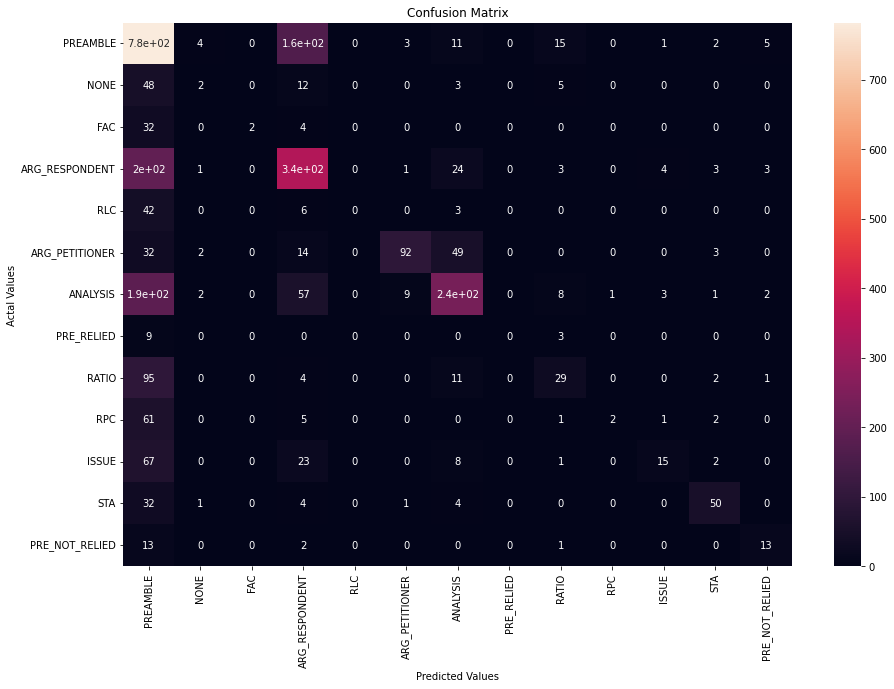

In [19]:
#Plotting the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### *DOC2VEC*

In [48]:
#import all required libraries
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import re

In [49]:
x_train['text'].apply(lambda x: len(x.split(' '))).sum()
x_test['text'].apply(lambda x: len(x.split(' '))).sum()

84402

In [50]:
X_d2v_train = x_train['text']
y_d2v_train = x_train['output']
X_d2v_test = x_test['text']
y_d2v_test = x_test['output']

In [51]:
def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled
# X_d2v_train, X_d2v_test, y_d2v_train, y_d2v_test = train_test_split(df.text, df.output, random_state=0, test_size=0.3)
X_d2v_train = label_sentences(X_d2v_train, 'Train')
X_d2v_test = label_sentences(X_d2v_test, 'Test')
all_data = X_d2v_train + X_d2v_test

In [52]:
all_data[:2]

[TaggedDocument(words=['IN', 'THE', 'HIGH', 'COURT', 'OF', 'KARNATAKA,', 'CIRCUIT', 'BENCH', 'AT', 'GULBARGA', 'DATED', 'THIS', 'THE', '22ND', 'DAY', 'OF', 'FEBRUARY,', '2013'], tags=['Train_0']),
 TaggedDocument(words=['BEFORE', 'THE', "HON'BLE", 'MR.JUSTICE', 'ANAND', 'BYRAREDDY', 'CRIMINAL', 'APPEAL', 'NO.3532', 'OF', '2012', 'BETWEEN:', 'R', 'Babu', 'S/o', 'Siddappa,', '..', 'APPELLANT', 'Age:', '30', 'Years,', 'Occ:', 'Household,', 'R/o:', 'Sunthan', 'Village,', 'Taluk', 'Chincholi,', 'District', 'Gulbarga.', '(By', 'Shri', 'Ishwar', 'Raj', 'S.Chowdapur,', 'Advocate)', 'AND:', 'The', 'State', 'of', 'Karnataka', '..', 'RESPONDENT', '(Through', 'Ratkal', 'Police', 'Station)', 'Represented', 'by', 'Additional', 'State', 'Public', 'Prosecutor,', 'Circuit', 'Bench,', 'Gulbarga.', '(By', 'Shri', 'S.S.Aspalli,', 'Government', 'Pleader)'], tags=['Train_1'])]

In [53]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(60):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 31876/31876 [00:00<00:00, 2008225.83it/s]


In [54]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_d2v_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_d2v_test), 300, 'Test')

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logreg = LogisticRegression(n_jobs=1, C=1e5, max_iter = 70)
logreg.fit(train_vectors_dbow, y_d2v_train)
logreg = logreg.fit(train_vectors_dbow, y_d2v_train)
y_pred = logreg.predict(test_vectors_dbow)
print('accuracy %s' % metrics.accuracy_score(y_d2v_test, y_pred))
print('F1 score %s' % metrics.f1_score(y_d2v_test, y_pred, average = "macro"))
print('precision %s' % metrics.precision_score(y_d2v_test, y_pred, average = "macro"))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


accuracy 0.5332179930795847
F1 score 0.3569063012670171
precision 0.46079523508796877


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm_d2v = confusion_matrix(y_d2v_test, y_pred)

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_d2v = pd.DataFrame(cm_d2v,
                     index = ['PREAMBLE', 'NONE', 'FAC', 'ARG_RESPONDENT', 'RLC', 'ARG_PETITIONER', 'ANALYSIS', 'PRE_RELIED', 'RATIO', 'RPC', 'ISSUE', 'STA', 'PRE_NOT_RELIED'], 
                     columns = ['PREAMBLE', 'NONE', 'FAC', 'ARG_RESPONDENT', 'RLC', 'ARG_PETITIONER', 'ANALYSIS', 'PRE_RELIED', 'RATIO', 'RPC', 'ISSUE', 'STA', 'PRE_NOT_RELIED'])

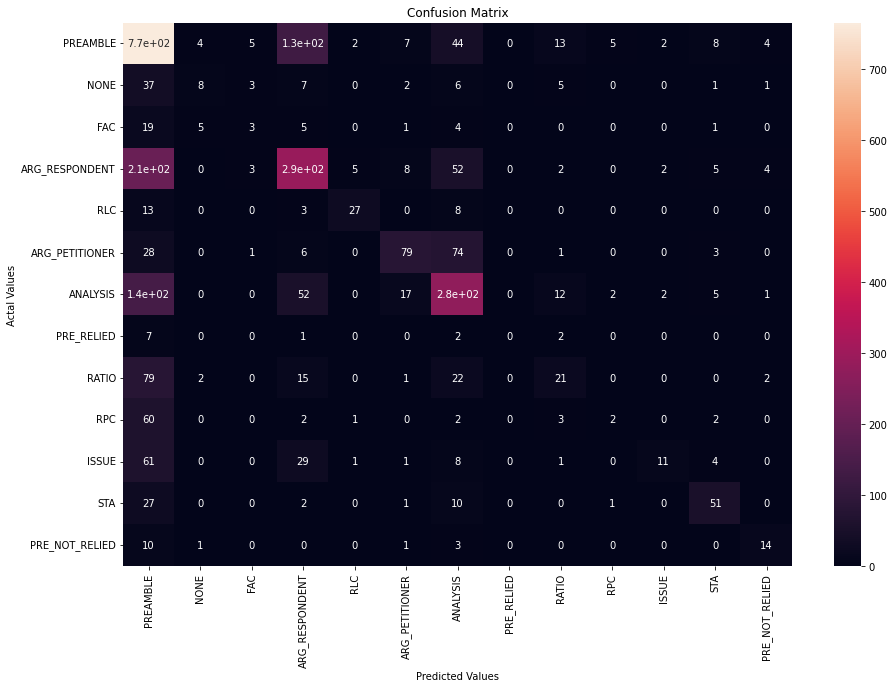

In [31]:
#Plotting the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm_df_d2v, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()